In [1]:
from sklearn.svm import SVC
from IPython.display import display
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import ActiveLearning as al
import dataset

In [2]:
data = dataset.loadAddressPair()

# Taille de l'ensemble d'apprentissage et stratégie d'échantillonnage

In [14]:
nbIterations = 400
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
X_raw = data.iloc[:,:19].values
y_raw = data['Label'].values

nb_initial_labeled_data = 10
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history10M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 30
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history30M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 50
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history50M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 100
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history100M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

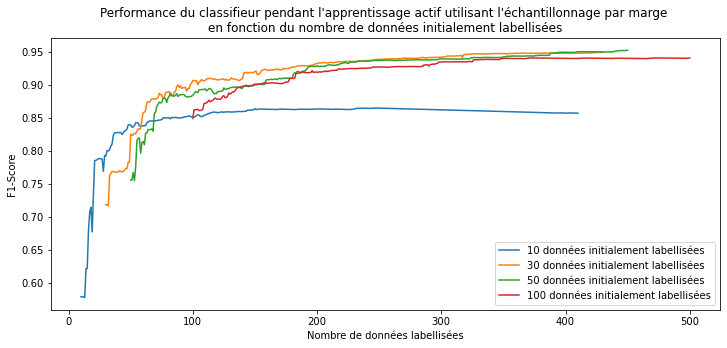

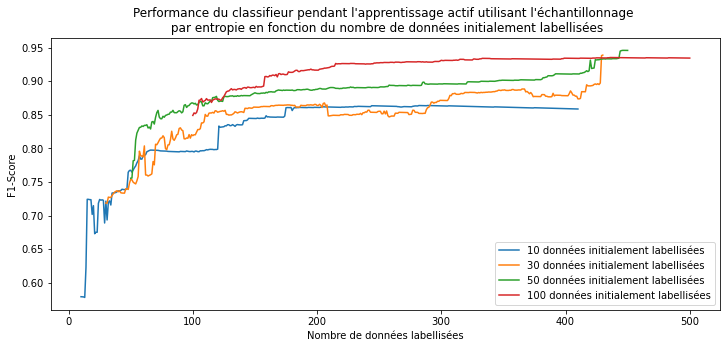

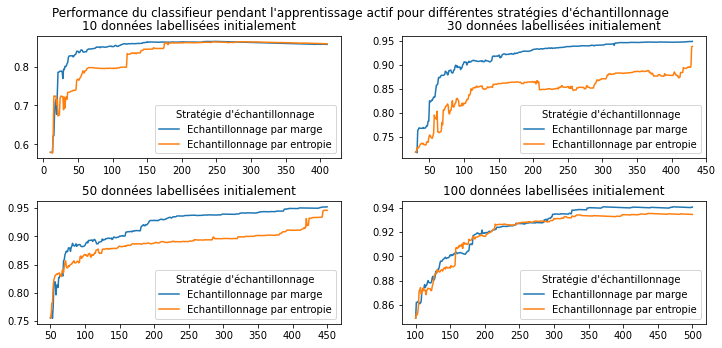

In [17]:
#Plot Margin 
plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction du nombre de données initialement labellisées')
plt.plot(range(10, 10+nbIterations+1), performance_history10M, label='10 données initialement labellisées')
plt.plot(range(30, 30+nbIterations+1), performance_history30M, label='30 données initialement labellisées')
plt.plot(range(50, 50+nbIterations+1), performance_history50M, label='50 données initialement labellisées')
plt.plot(range(100, 100+nbIterations+1), performance_history100M, label='100 données initialement labellisées')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

#Plot Entropy
plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage \n par entropie en fonction du nombre de données initialement labellisées')
plt.plot(range(10, 10+nbIterations+1), performance_history10E, label='10 données initialement labellisées')
plt.plot(range(30, 30+nbIterations+1), performance_history30E, label='30 données initialement labellisées')
plt.plot(range(50, 50+nbIterations+1), performance_history50E, label='50 données initialement labellisées')
plt.plot(range(100, 100+nbIterations+1), performance_history100E, label='100 données initialement labellisées')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

#Plot Margin vs Entropy
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,5), sharex=False)
fig.suptitle('Performance du classifieur pendant l\'apprentissage actif pour différentes stratégies d\'échantillonnage')
ax1.plot(range(10, 10+nbIterations+1), performance_history10M, label='Echantillonnage par marge')
ax1.plot(range(10, 10+nbIterations+1), performance_history10E, label='Echantillonnage par entropie')
ax2.plot(range(30, 30+nbIterations+1), performance_history30M, label='Echantillonnage par marge')
ax2.plot(range(30, 30+nbIterations+1), performance_history30E, label='Echantillonnage par entropie')
ax3.plot(range(50, 50+nbIterations+1), performance_history50M, label='Echantillonnage par marge')
ax3.plot(range(50, 50+nbIterations+1), performance_history50E, label='Echantillonnage par entropie')
ax4.plot(range(100, 100+nbIterations+1), performance_history100M, label='Echantillonnage par marge')
ax4.plot(range(100, 100+nbIterations+1), performance_history100E, label='Echantillonnage par entropie')
ax1.set_title('10 données labellisées initialement')
ax2.set_title('30 données labellisées initialement')
ax3.set_title('50 données labellisées initialement')
ax4.set_title('100 données labellisées initialement')
ax1.legend(title='Stratégie d\'échantillonnage')
ax2.legend(title='Stratégie d\'échantillonnage')
ax3.legend(title='Stratégie d\'échantillonnage')
ax4.legend(title='Stratégie d\'échantillonnage')
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.2, hspace=0.35)
plt.show()

# Taille de l'ensemble de test

In [ ]:
que les performances du modèle estimées à partir de 10\% des données sont aussi proche des performances estimées sur 100\% des données que celles estimées sur 30\% des données initiales.

In [74]:
X_raw = data.iloc[:,:19].values
y_raw = data['Label'].values
nb_iterations = 400
n_initial = 50

test_size = 300
performance_historyTest300 = np.zeros(shape=nb_iterations+1)
performance_historyRef300 = np.zeros(shape=nb_iterations+1)
for i in range(0,10):
    X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(X_raw, y_raw, n_initial, test_size)
    X_pool = X_pool[:,:19]
    X_train = X_train[:,:19]
    X_test = X_test[:,:19]
    performanceTest = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)
    performanceRef = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
    performance_historyTest300 = np.add(performance_historyTest300, np.array(performanceTest))
    performance_historyRef300 = np.add(performance_historyRef300, np.array(performanceRef))
performance_historyTest300 = performance_historyTest300/10
performance_historyRef300 = performance_historyRef300/10

    
test_size = 600
performance_historyTest600 = np.zeros(shape=nb_iterations+1)
performance_historyRef600 = np.zeros(shape=nb_iterations+1)
for i in range(0,10):
    X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(X_raw, y_raw, n_initial, test_size)
    X_pool = X_pool[:,:19]
    X_train = X_train[:,:19]
    X_test = X_test[:,:19]
    performanceTest = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)
    performanceRef = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
    performance_historyTest600 = np.add(performance_historyTest600, np.array(performanceTest))
    performance_historyRef600 = np.add(performance_historyRef600, np.array(performanceRef))
performance_historyTest600 = performance_historyTest600/10
performance_historyRef600 = performance_historyRef600/10

test_size = 900
performance_historyTest900 = np.zeros(shape=nb_iterations+1)
performance_historyRef900 = np.zeros(shape=nb_iterations+1)
for i in range(0,10):
    X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(X_raw, y_raw, n_initial, test_size)
    X_pool = X_pool[:,:19]
    X_train = X_train[:,:19]
    X_test = X_test[:,:19]
    performanceTest = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)
    performanceRef = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
    performance_historyTest900 = np.add(performance_historyTest900, np.array(performanceTest))
    performance_historyRef900 = np.add(performance_historyRef900, np.array(performanceRef))
performance_historyTest900 = performance_historyTest900/10
performance_historyRef900 = performance_historyRef900/10

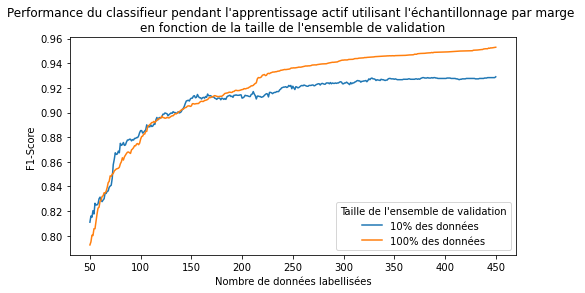

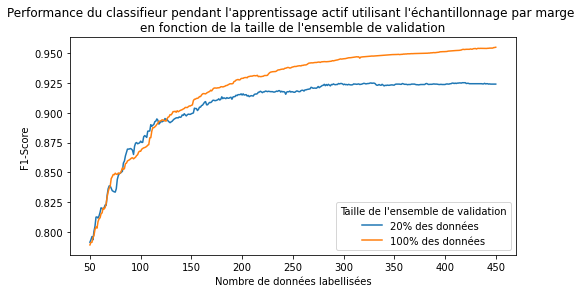

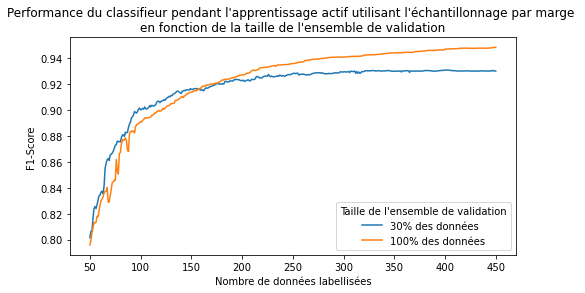

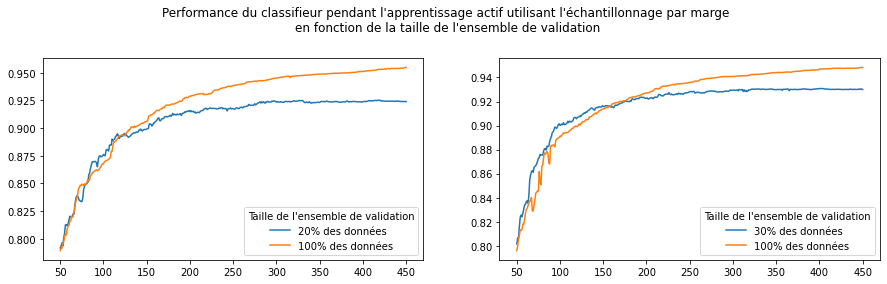

In [92]:
plt.figure(figsize=(8, 4))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
plt.plot(range(50, 50+nb_iterations+1), performance_historyTest300, label='10% des données')
plt.plot(range(50, 50+nb_iterations+1), performance_historyRef300, label='100% des données')
plt.legend(title='Taille de l\'ensemble de validation')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
plt.plot(range(50, 50+nb_iterations+1), performance_historyTest600, label='20% des données')
plt.plot(range(50, 50+nb_iterations+1), performance_historyRef600, label='100% des données')
plt.legend(title='Taille de l\'ensemble de validation')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()


plt.figure(figsize=(8, 4))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
plt.plot(range(50, 50+nb_iterations+1), performance_historyTest900, label='30% des données')
plt.plot(range(50, 50+nb_iterations+1), performance_historyRef900, label='100% des données')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend(title='Taille de l\'ensemble de validation')
plt.show()


#Plot Margin vs Entropy
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,4), sharex=False)
fig.suptitle('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
ax1.plot(range(50, 50+nb_iterations+1), performance_historyTest600, label='20% des données')
ax1.plot(range(50, 50+nb_iterations+1), performance_historyRef600, label='100% des données')
ax2.plot(range(50, 50+nb_iterations+1), performance_historyTest900, label='30% des données')
ax2.plot(range(50, 50+nb_iterations+1), performance_historyRef900, label='100% des données')
ax1.legend(title='Taille de l\'ensemble de validation')
ax2.legend(title='Taille de l\'ensemble de validation')
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, 
                    top=0.8, wspace=0.2, hspace=0.35)
plt.show()

# Critère d'arrêt : Seuil de différence de performance

In [3]:
def autoAL_PerfStability(classifier, sampleRequest, nbPredictions, seuilStabilite, X_train, y_train,X_test,y_test, X_pool, y_pool):
    
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    
    model_accuracy = learner.score(X_test, y_test)
    performance_history = [model_accuracy]
    while len(X_pool > 0):
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_test, y_test)
        performance_history.append(model_accuracy)
        if(len(performance_history) >nbPredictions and perfStability(performance_history[-nbPredictions:], seuilStabilite)):
            break
    return performance_history

def perfStability(performances, seuilStabilite):
    meanStability = 0
    count = 0
    for i in range(0,len(performances)-1):
        for j in range(i+1,len(performances)):
            count +=1
            meanStability += abs(performances[i] - performances[j])
    meanStability /= count
    return (meanStability <= seuilStabilite)         

In [4]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

n_initial = 50
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
test_size = 600
nb_iterations = 400
nb_iterForStability = 30
perfDiff = 0.001

X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19]
X_train = X_train[:,:19]
X_test = X_test[:,:19]
performance_SPerf001 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.001, X_train, y_train,X_test,y_test, X_pool, y_pool)
performance_SPerf01 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.01, X_train, y_train,X_test,y_test, X_pool, y_pool)
performance_SPerf1 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 1, X_train, y_train,X_test,y_test, X_pool, y_pool)

performance_Iter = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)


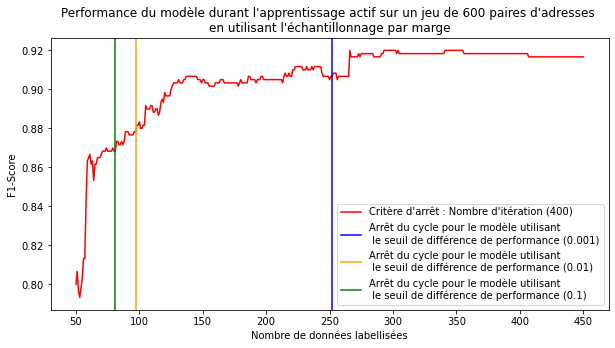

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Performance du modèle durant l\'apprentissage actif sur un jeu de 600 paires d\'adresses \n' +
          'en utilisant l\'échantillonnage par marge')
#plt.plot(range(n_initial, n_initial+len(performance_SPerf001)-1+1), performance_SPerf001, label='Seuil de différence de performance (0.001)')
#plt.plot(range(n_initial, n_initial+len(performance_SPerf01)-1+1), performance_SPerf01, label='Seuil de différence de performance (0.01)')
#plt.plot(range(n_initial, n_initial+len(performance_SPerf1)-1+1), performance_SPerf1, label='Seuil de différence de performance (0.1)')
plt.plot(range(n_initial, n_initial+len(performance_Iter)-1+1), performance_Iter, color='red', label ='Critère d\'arrêt : Nombre d\'itération (400)')
plt.axvline(x = len(performance_SPerf001) +50, color = "blue", label="Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance (0.001)") # Plotting a single vertical line
plt.axvline(x = len(performance_SPerf01) +50, color = "orange", label="Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance (0.01)") # Plotting a single vertical line
plt.axvline(x = len(performance_SPerf1) + 50, color = "green", label="Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance (0.1)") # Plotting a single vertical line

plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

In [94]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

n_initial = 50
test_size = 600
nb_iterations = 400
nb_iterForStability = 20
perfDiff = 0.001
labellisationCost001 = []
labellisationCost01 = []
labellisationCost05 = []
labellisationCost1 = []
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)

X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19].copy()
X_train = X_train[:,:19].copy()
X_test = X_test[:,:19].copy()
y_test = y_test.copy()
y_pool = y_pool.copy()
y_train = y_train.copy()
performance_Iter = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)

for i in range(0,10):
    performance_SPerf001 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.001, X_train, y_train,X_test,y_test, X_pool, y_pool)
    performance_SPerf05 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.05, X_train, y_train,X_test,y_test, X_pool, y_pool)
    performance_SPerf01 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.01, X_train, y_train,X_test,y_test, X_pool, y_pool)
    performance_SPerf1 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.1, X_train, y_train,X_test,y_test, X_pool, y_pool)
    
    labellisationCost001.append(len(performance_SPerf001) + n_initial)
    labellisationCost01.append(len(performance_SPerf01) + n_initial)    
    labellisationCost05.append(len(performance_SPerf05) + n_initial)    
    labellisationCost1.append(len(performance_SPerf1) + n_initial)
print(labellisationCost001)
print(labellisationCost01)
print(labellisationCost05)
print(labellisationCost1)

[340, 211, 353, 318, 241, 317, 241, 244, 361, 279]
[71, 75, 90, 93, 79, 89, 98, 104, 96, 90]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71]


In [67]:
print(sum(labellisationCost1)/10)
print(performance_Iter[int(sum(labellisationCost1)/10)])

81.0
0.8833333333333333


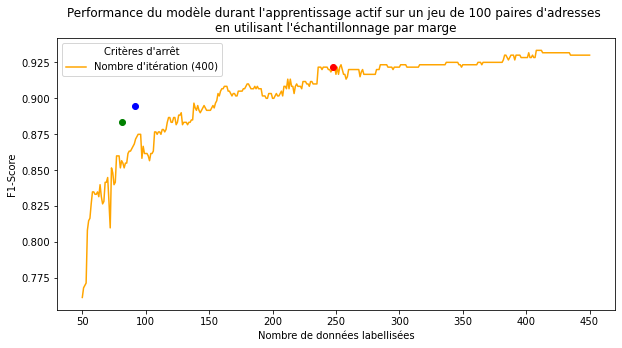

In [70]:
plt.figure(figsize=(10, 5))
plt.title('Performance du modèle durant l\'apprentissage actif sur un jeu de 100 paires d\'adresses \n' +
          'en utilisant l\'échantillonnage par marge')
plt.plot(range(n_initial, n_initial+len(performance_Iter)-1+1),performance_Iter, color='orange', label='Nombre d\'itération (400)')
plt.plot(sum(labellisationCost001)/10,performance_Iter[int(sum(labellisationCost001)/10)], marker = 'o', color = "red")
plt.plot(sum(labellisationCost01)/10,performance_Iter[int(sum(labellisationCost01)/10)], marker = 'o', color = "blue")
plt.plot(sum(labellisationCost1)/10,performance_Iter[int(sum(labellisationCost1)/10)], marker = 'o', color = "green")
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend(title='Critères d\'arrêt')
plt.show()

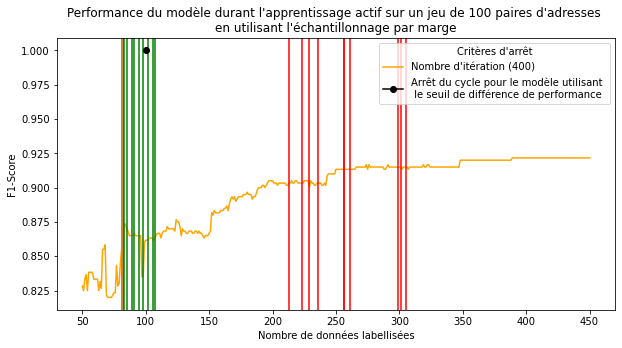

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Performance du modèle durant l\'apprentissage actif sur un jeu de 100 paires d\'adresses \n' +
          'en utilisant l\'échantillonnage par marge')
plt.plot(range(n_initial, n_initial+len(performance_Iter)-1+1),performance_Iter, color='orange', label='Nombre d\'itération (400)')
for i in range(0,10):
    plt.axvline(x = labellisationCost001[i], color = "red") # Plotting a single vertical line
    plt.axvline(x = labellisationCost01[i], color = "green") # Plotting a single vertical line
    plt.axvline(x = labellisationCost1[i], color = "blue") # Plotting a single vertical line
    plt.axvline(x = labellisationCost05[i], color = "orange") # Plotting a single vertical line
plt.plot(100,1, marker="o", color="black",label = "Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance") # Plotting a single vertical line
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend(title='Critères d\'arrêt')
plt.show()

# Critère d'arrêt stabilité de prédiction

In [44]:
def autoAL_PredStability(classifier, sampleRequest, nbPredictions, seuilStabilite, X_train, y_train,X_test,y_test, X_pool, y_pool):
    
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    
    predictionsList = []
    for i in range(0, nbPredictions):
        predictionsList.append([])
    predictionsList[-2] = classifier.predict(X_test)
    model_accuracy = learner.score(X_pool, y_pool)
    performance_history = [model_accuracy]
    stability_history = []
    stabilityIterations = 0

    while len(X_pool > 0) and stabilityIterations < 50:
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_pool, y_pool)
        performance_history.append(model_accuracy)
        predictionsList[-1] = classifier.predict(X_test)
        isStable, stability = predictionStability(predictionsList, seuilStabilite)
        stability_history.append(stability)
        for i in range(0, len(predictionsList)-2):
            predictionsList[i] = predictionsList[i+1]
        if(isStable):
            stabilityIterations += 1
        else:
            stabilityIterations = 0
    return performance_history, stability_history

def predictionStability(predictionsList, seuilStabilite):
    meanStability = 0
    count = 0
    for i in range(0,len(predictionsList)-1):
        for j in range(i+1,len(predictionsList)):
            count +=1
            meanStability += stability(predictionsList[i], predictionsList[j], seuilStabilite)
    meanStability /= count
    return (meanStability >= seuilStabilite), meanStability

def stability(lastPredictions, currentPredictions, seuilStabilite):
    if(len(lastPredictions) == 0  or len(currentPredictions) == 0):
        return 0;
    nbPredictions = len(lastPredictions) 
    nb_samePredictions = np.equal(lastPredictions,currentPredictions).sum()
    stability = nb_samePredictions / nbPredictions
    return stability

In [46]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

n_initial = 100
nb_iterations = 100
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)

test_size = 600
X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19]
X_train = X_train[:,:19]
X_test = X_test[:,:19]

performance_history , stability_history = autoAL_PredStability(classifier, margin_sampling,30, 0.97, X_train, y_train,X_test,y_test, X_pool, y_pool)

Data distribution {'Match': 931, 'NoMatch': 1652, 'PartialMatch': 417}


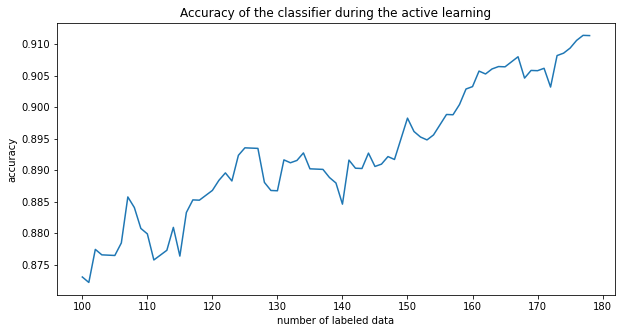

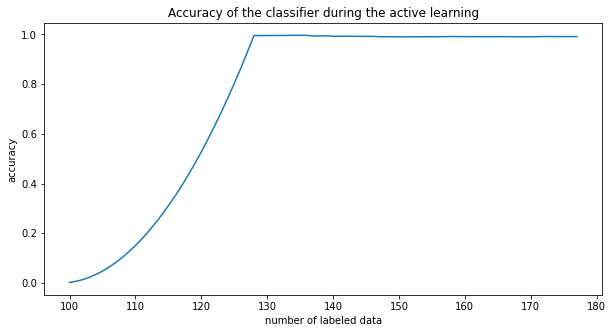

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy of the classifier during the active learning')
plt.plot(range(n_initial, n_initial+len(performance_history)-1+1), performance_history)
plt.xlabel('number of labeled data')
plt.ylabel('accuracy')
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Accuracy of the classifier during the active learning')
plt.plot(range(n_initial, n_initial+len(stability_history)-1+1), stability_history)
plt.xlabel('number of labeled data')
plt.ylabel('accuracy')
plt.show()

# Labellisation par un Oracle humain

In [ ]:
test_size = 600
X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19]
X_train = X_train[:,:19]
X_test = X_test[:,:19]